## Configuration

#### Import Packages

In [1]:
import numpy as np
import os
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator, load_img
import random

Using TensorFlow backend.


#### File Paths

In [2]:
folder_path = "D:/dogs_cats/train/train/"
cat_file_paths = [folder_path + f for f in os.listdir(folder_path) if 'cat' in f]
dog_file_paths = [folder_path + f for f in os.listdir(folder_path) if 'dog' in f]

## Define Functions

In [3]:
def img_add_flip(arr, flip_horiz = True, flip_vert = False):
    """
    Flip numpy array horizontally and/or vertically
    Args:
        arr: three dimensional numpy array
        flip_horiz: flip image horizontally
        flip_vert: flip image vertically
    """
    assert len(arr.shape) == 3, "'arr' input array must be three dimensional"
    arr_copy = arr.copy()
    if flip_horiz:
        arr_copy = np.fliplr(arr_copy)
    if flip_vert:
        arr_copy = np.flipud(arr_copy)
    return arr_copy
    
def img_add_random_noise(arr, noise_perc = 0.05):
    """
    Randomly change <noise_perc> % of pixels in an image
    Args:
        arr: three dimensional numpy array
        noise_perc: percentage of values to replace    
    """
    assert len(arr.shape) == 3, "'arr' input array must be three dimensional"
    arr_copy = arr.copy()
    noise = np.random.randint(np.max(arr), size = arr.shape)
    rand_numbers = random.sample(range(100), int(noise_perc * 100))
    for x in range(arr.shape[0]):
        for y in range(arr.shape[1]):
            for z in range(arr.shape[2]):
                if random.choice(range(100)) in rand_numbers:
                    arr_copy[x][y][z] += noise[x][y][z]
    return arr_copy
                

def img_add_stripe_noise(arr, stripe_perc = 0.05, stripe_direction = 'h'):
    """
    Add horizontal stripe of randomly colored pixels within a 3d numpy array
    Args:
        arr: three dimensional numpy array
        stripe_perc: height or width of noise stripe (percentage of array dimension)
        stripe_direction: the direction of the noise strip (horizonal or vertical)
    """
    assert len(arr.shape) == 3, "'arr' input array must be three dimensional"
    assert stripe_direction in ['h', 'v'], "'stripe_direction' parameter must be 'v' or 'h'"
    arr_copy = arr.copy()
    noise = np.random.randint(np.max(arr), size = arr.shape)
    if stripe_direction == 'h':
        use_dim = 0
    else:
        use_dim = 1
    
    # Stripe position
    pixel_length = int(stripe_perc * arr.shape[use_dim])
    stripe_start = random.choice(range(arr.shape[use_dim] - pixel_length))
    stripe_end = stripe_start + pixel_length
    stripe_range = range(stripe_start, stripe_end)
    
    # Value replacement
    for x in range(arr.shape[0]):
        for y in range(arr.shape[1]):
            for z in range(arr.shape[2]):
                if stripe_direction == 'h':
                    if x in stripe_range:
                        arr_copy[x][y][z] += noise[x][y][z]
                else:
                    if y in stripe_range:
                        arr_copy[x][y][z] += noise[x][y][z]
    return arr_copy

## Execute Functions

#### Look at one cat picture before augmenting

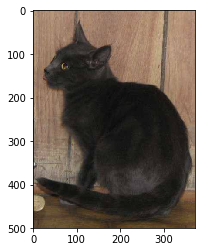

In [4]:
one_cat = np.array(load_img(cat_file_paths[20]))
plt.imshow(one_cat)

#### Flip vertically

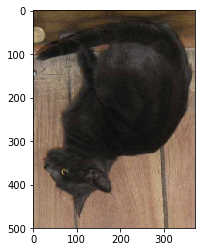

In [5]:
v_flip_cat = img_add_flip(one_cat, flip_horiz = False, flip_vert = True)
plt.imshow(v_flip_cat)

#### Flip horizontally

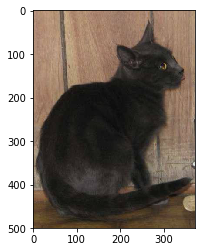

In [6]:
h_flip_cat = img_add_flip(one_cat, flip_horiz = True, flip_vert = False)
plt.imshow(h_flip_cat)

#### Flip vertically and horizontally

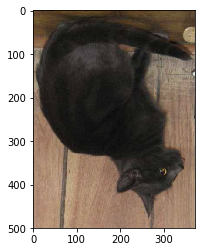

In [7]:
vh_flip_cat = img_add_flip(one_cat, flip_horiz = True, flip_vert = True)
plt.imshow(vh_flip_cat)

#### Add random noise

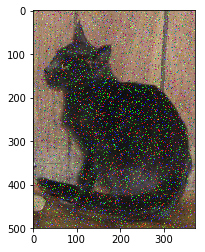

In [8]:
one_noisy_cat = img_add_random_noise(one_cat, noise_perc = .1)
plt.imshow(one_noisy_cat)

#### Add vertical stripe

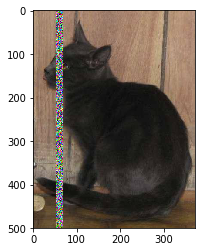

In [9]:
v_stripe_cat = img_add_stripe_noise(one_cat, stripe_perc = 0.05, stripe_direction = 'v')
plt.imshow(v_stripe_cat)

#### Add horizontal stripe

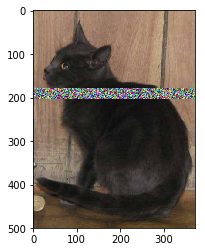

In [10]:
h_stripe_cat = img_add_stripe_noise(one_cat, stripe_perc = 0.05, stripe_direction = 'h')
plt.imshow(h_stripe_cat)